# EDA 2018 Kickstarter

Projet d'EDA réalisé dans le cadre d'un partiel en Mastère Big Data et marketing digital à HETIC.

Réalisé par **Vincent SCHUCK**

L'objectif de cet EDA est de mettre en avant les facteurs qui permettent de prédire la réussite d'un projet sur la plateforme de crowdfunding Kickstarter

**ID** | internal kickstarter id

**name** | name of project - a project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films

**category** | category

**main_category** | category of campaign

**currency** | currency used to support

**deadline** | deadline for crowdfunding

**goal** | fundraising goal - the funding goal is the amount of money that a creator needs to complete their project

**launched** | date launched

**pledged** | pledged amount in the project currency

**state** | current condition the project is in

**backers** | number of backers

**country** | country pledged from

**usd pledged** | amount of money pledged in USD (conversion made by Kickstarter)

**usd_pledged_real** | amount of money pledged in USD (conversion made by fixer.io api)

**usd_goal_real** | goal amount in USD (conversion made by fixer.io api)

In [216]:
# Importation des dépendances nécessaires à la mise en place d'un EDA

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Prise en main du dataset

In [217]:
# Chargement et affectation du dataset

df = pd.read_csv('dataset.csv', index_col=0)

In [218]:
# Affichage du début du dataset

df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [219]:
# Affichage de la fin du dataset

df.tail()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


In [220]:
# Affichage des infos du dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 43.3+ MB


In [222]:
# Affichage de certaines données du dataset

print("Le dataset comporte {} entrées et {} variables.".format(df.shape[0], df.shape[1]))

Le dataset comporte 378661 entrées et 14 variables.


In [223]:
# Affichage des catégories

df.columns.tolist()

['name',
 'category',
 'main_category',
 'currency',
 'deadline',
 'goal',
 'launched',
 'pledged',
 'state',
 'backers',
 'country',
 'usd pledged',
 'usd_pledged_real',
 'usd_goal_real']

On observe que la colonne 'usd pledged' n'est pas normalisée comme les autres colonnes. Nous allons donc la renommer en 'usd_pledged' pour une meilleure manipulation du dataset

In [224]:
# Changement du nom de la colonne 'usd pledged'

df = df.rename(columns={'usd pledged': 'usd_pledged'})

In [225]:
# Affichage de calculs sur les données quantitatives

df.describe().T

,count,mean,std,min,25%,50%,75%,max
goal,378661.0,49080.791521,1.183391e+06,0.01,2000.00,5200.00,16000.00,1.000000e+08
pledged,378661.0,9682.979339,9.563601e+04,0.00,30.00,620.00,4076.00,2.033899e+07
backers,378661.0,105.617476,9.071850e+02,0.00,2.00,12.00,56.00,2.193820e+05
usd_pledged,374864.0,7036.728867,7.863975e+04,0.00,16.98,394.72,3034.09,2.033899e+07
usd_pledged_real,378661.0,9058.924074,9.097334e+04,0.00,31.00,624.33,4050.00,2.033899e+07
usd_goal_real,378661.0,45454.401465,1.152950e+06,0.01,2000.00,5500.00,15500.00,1.663614e+08


Pour l'ensemble des variables quantitatives, on observe une variation énorme entre le minimum et le maximum, avec un écart-type très élevé. Cependant nous observons aussi que la moyenne et la médiane sont bien inférieures aux valeurs maximales. Il sera donc intéressant d'observer si les valeurs extrèmes sont incohérentes avec le reste du dataset ou non.

## 2) Valeurs manquantes et dupliquées

In [11]:
# Ressencement des valeurs dupliquées

df.duplicated().sum()

0

Nous n'avons aucune valeurs dupliquées, il n'y a donc pas de traitement particulier à apporter.

In [226]:
# Ressencement des valeurs nulles

df.isna().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd_pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

Text(0.5,0.98,'Fréquences de valeurs par variable')

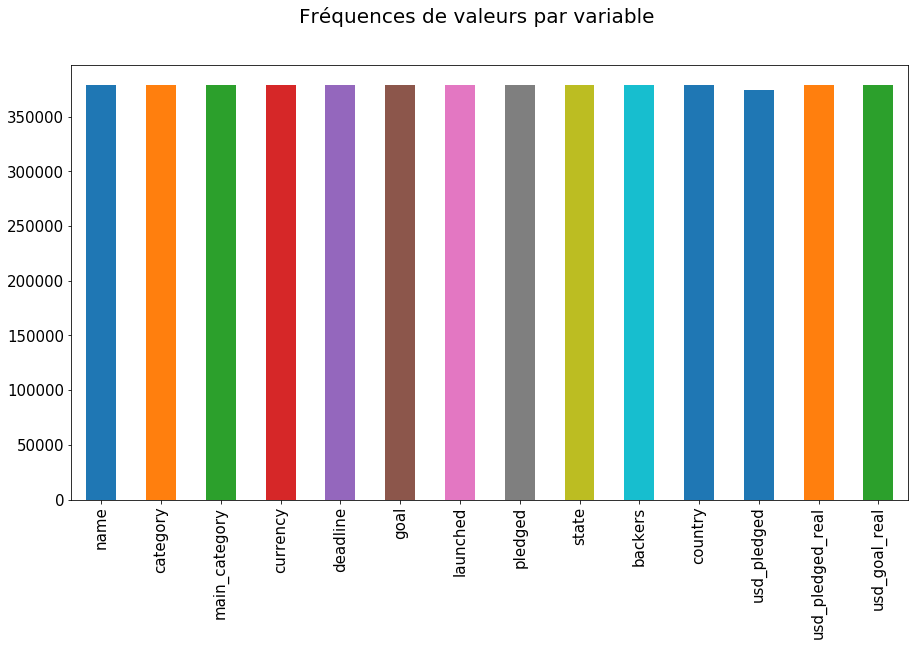

In [227]:
# Graphique de la fréquence de valeurs par variable

fig, ax = plt.subplots(figsize=(15, 8))

df.count().plot.bar(fontsize=15)

fig.suptitle('Fréquences de valeurs par variable', fontsize=20)

Nous observons des valeurs manquantes pour les variables 'name' et 'usd_pledged'

Pour les noms, étant donné qu'il en manque très peu et qu'un projet sans nom n'a pas vraiment de sens, nous allons supprimer les projets qui n'ont pas de nom

In [228]:
# Suppressions des entrées avec un nom inconnu

df = df.dropna(subset=['name'])

Après analyse du dataset, on se rend compte que la plupart du temps, la variable 'usd_pledged' a la même valeur que 'usd_pledged_real'.

Nous avons ici 3797 valeurs manquantes sur 378657, ce qui est faible mais suffisant pour ne pas supprimer les projets. J'ai donc décidé que les valeurs manquantes de 'usd_pledged' allez récupérer la valeur de 'usd_pledged_real'.

In [229]:
# Remplacement des valeurs de 'usd_pledged' nulles

df.usd_pledged.fillna(value=df.usd_pledged_real, inplace=True)

Nous avons maintenant une base 'propre', sans valeurs dupliquées ou manquantes

## 3) Outliers

Text(0.5,0.98,'Visualisation des outliers')

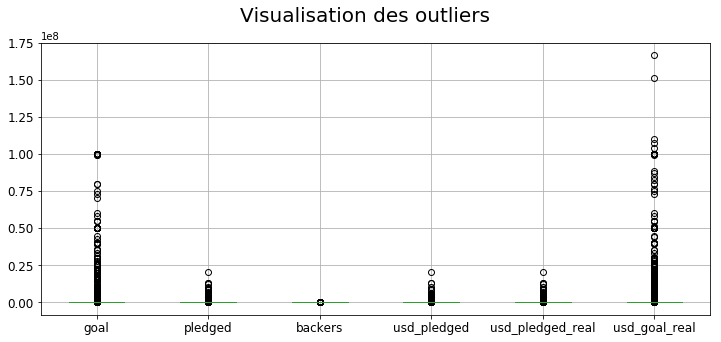

In [230]:
# Graphique permettant la visualisation des outliers

quanti = ['goal', 'pledged', 'backers', 'usd_pledged', 'usd_pledged_real', 'usd_goal_real']

fig, ax = plt.subplots(figsize=(12, 5))
df.boxplot(quanti, fontsize=12)
fig.suptitle('Visualisation des outliers', fontsize=20)



Comme on pouvait s'y attendre, il y a beaucoup d'outliers, avec des écarts énormes. Cependant, Kickstarter est une plateforme de crowdfunding qui permet de déposer toutes sortes de projet, allant de la création d'un stylo révolutionnaire à la mise en place d'un projet pour aller sur la planète Mars. Il est donc normal que les objectifs financiers de certains projets soit extrèmement conséquents comparé à des projets plus modestes. Même chose pour le nombre de personnes qui soutiennent un projet, cela varie en fonction de l'attente autour du projet.

Ces chiffres, mêmes extremes, sont des valeurs qui restent cohérentes. Elles ne seront donc pas supprimées.

## 4) Analyse Univariée

Text(0.5,1,'Classement des projets en fonction de leur état')

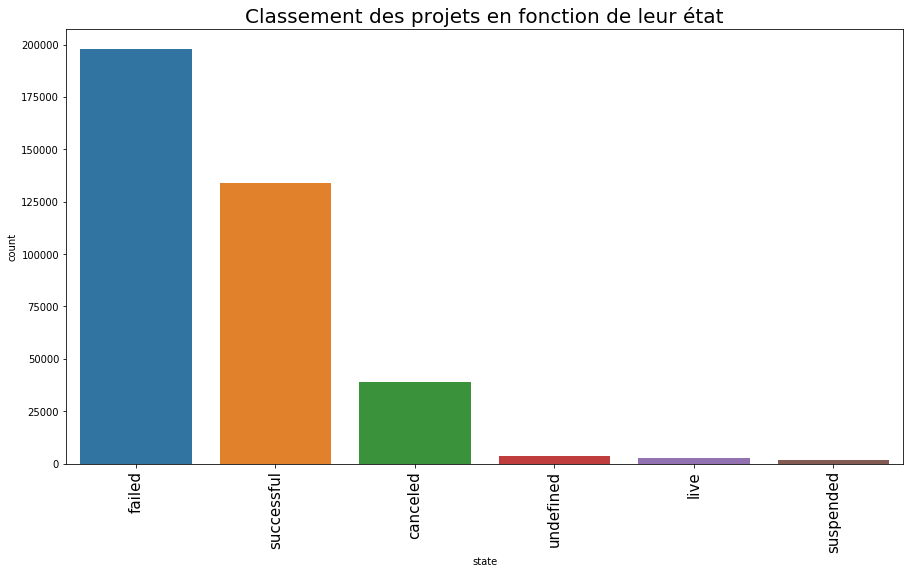

In [231]:
# Graphique montrant le classement des projets en fonction de leur état

fig, ax = plt.subplots(figsize=(15, 8))

g = sns.countplot(df['state'], order = df['state'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=15)
g.set_title('Classement des projets en fonction de leur état', fontsize=20)

Ce qui ressort ici est qu'il y a plus de projet raté que réussi. Les projets 'canceled', 'undefined', 'live' et 'suspended' ne représentent qu'une faible part des projets. Nous allons donc nous focaliser sur les projets réussi et les autres.

In [242]:
# Calcul du pourcentage de projet réussi sur l'ensemble des projets

nb_success = df['name'][df['state'] == 'successful'].count()
nb_total = df['name'].count()

perc_success = nb_success/nb_total*100

perc_success.round(1)

print('On observe qu\' il y a seulement 35.4% des projets qui arrivent a atteindre leur objectif, ce qui est très faible')

On observe qu' il y a seulement 35.4% des projets qui arrivent a atteindre leur objectif, ce qui est très faible


Text(0.5,1,'Nombre de projet par catégorie')

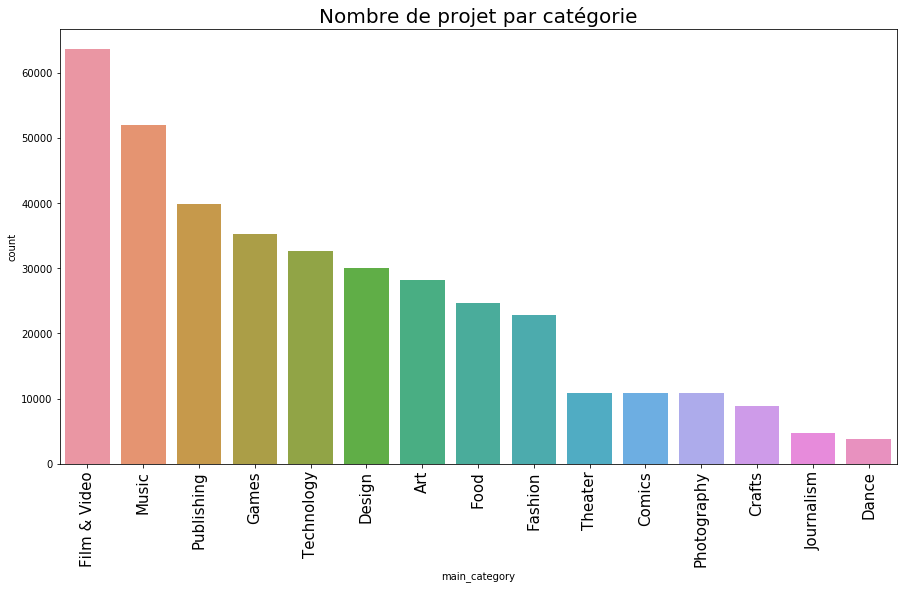

In [233]:
# Graphique montrant le nombre de projet par catégorie

fig, ax = plt.subplots(figsize=(15, 8))

g = sns.countplot(df['main_category'], order = df['main_category'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=15)
g.set_title('Nombre de projet par catégorie', fontsize=20)

Ce graphique nous permet de voir que la répartition des projets en fonction des catégories est très inégale. En effet, il y a beaucoup plus de projet dans les catégories 'Film & Video' ou 'Music' que dans les catégories 'Dance' ou 'Journalism' par exemple.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Répartition du montant des objectifs par projets')

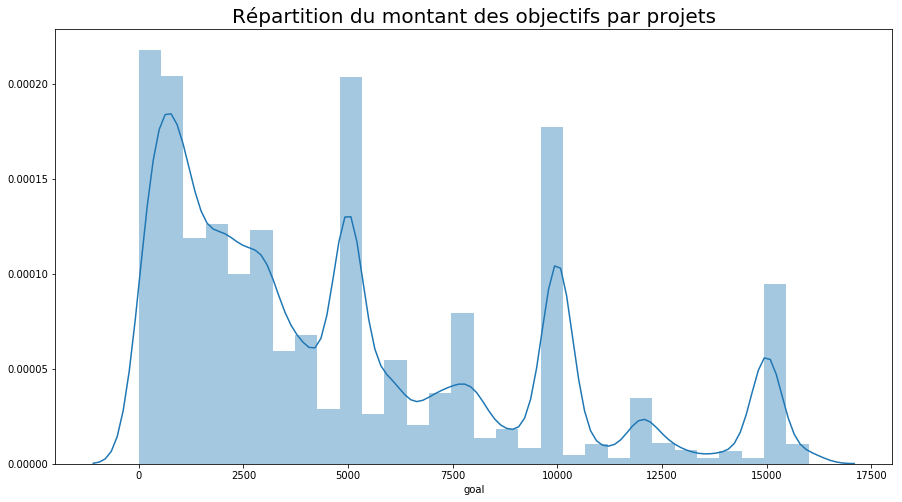

In [234]:
# Graphique montrant la répartition du montant des objectifs par projets

fig, ax = plt.subplots(figsize=(15, 8))

g = sns.distplot(df[df['goal'] <= 16000]['goal'], bins=30)
g.set_title('Répartition du montant des objectifs par projets', fontsize=20)

Afin d'avoir un graphique plus représentatif, j'ai volontairement fait un histogramme uniquement sur les valeurs inférieurs à 16000$ (qui correspond au 3ème quartile). En effet, bien que les outliers soient important, ils sont tellement extrème qu'ils étendent le graphique au point de la rendre illisible.

Ici on repère plusieurs 'piques' (entre 0 et 1000, à 5000, à 10000 et à 15000). On retrouve bien ici le fait qu'il y a une très grande disparité entre les projets car chaque projet à des objectifs financiers complètement indépendant.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Répartition du montant touché par projets')

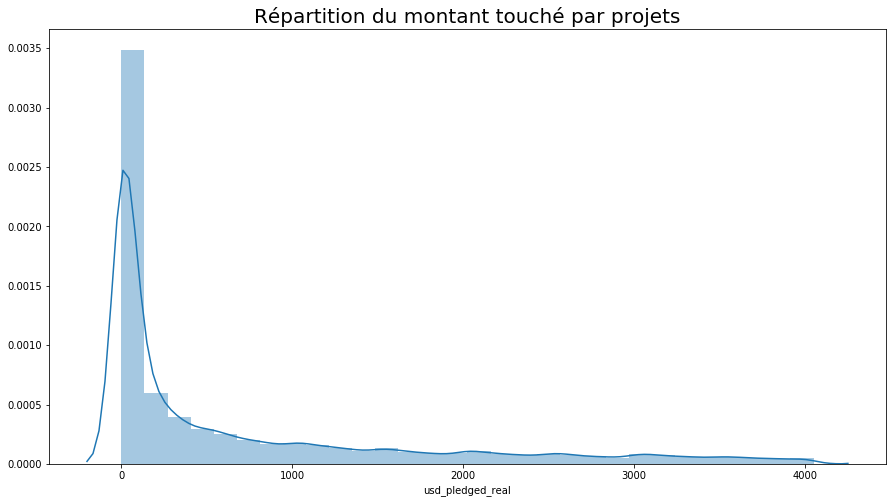

In [235]:
# Graphique montrant la répartition du montant touché par projets

fig, ax = plt.subplots(figsize=(15, 8))

g = sns.distplot(df[df['usd_pledged_real'] <= 4050]['usd_pledged_real'], bins=30)
g.set_title('Répartition du montant touché par projets', fontsize=20)

Même procédé pour la valeur de promesse de dons. On voit ici cependant qu'il y a une très grosse majorité des projets qui obtiennent moins de 100$ de soutien. On comprend mieux les 35 pourcents de réussite des projets.

## 5) Analyse Multivariée

Étant donné que seule la réussite d'un projet nous intéresse réellement, nous allons ajouter un colonne 'success' dont les valeurs seront un booléen (False en cas de non-réussite et True en cas de réussite). Dans notre analyse multivariée, il sera plus simple de comparer certaine variable avec cette nouvelle variable 'success' directement.

In [236]:
# Création d'un colonne success

df['success'] = df['state'] == 'successful'

Text(0.5,1,'Corrélation entre différentes variables du dataset')

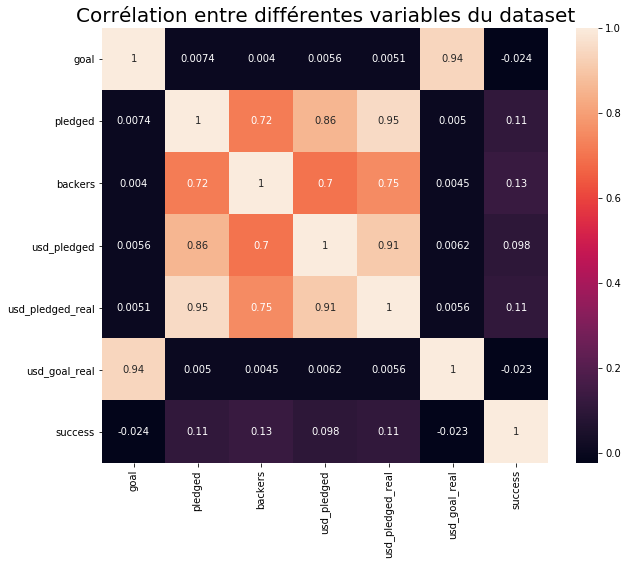

In [237]:
# Graphique montrant la corrélation entre différentes variables du dataset

fig, ax = plt.subplots(figsize=(10, 8))

g = sns.heatmap(df.corr(), annot=True)
g.set_title('Corrélation entre différentes variables du dataset', fontsize=20)

On observe sur ce graphique des corrélation très forte entre 'goal' et 'usd_goal_real' et entre 'usd_pledge_real', 'pledge_real' et 'pledge'. C'est tout à fait normal et pas vraiment intéressant, car ce sont les mêmes données avec juste un changement de convertisseur de devises utilisés. Nous n'allons donc pas nous attarder sur ces corrélations.

Cependant on peut aussi observer une assez forte corrélation en 'backers' et 'pledged', qui peut s'expliquer simplement. En effet, plus il y a de personnes qui soutiennent financièrement un projet, plus il y a de financement.

Text(0.5,1,'Catégorie des projets en fonction du succès du projet')

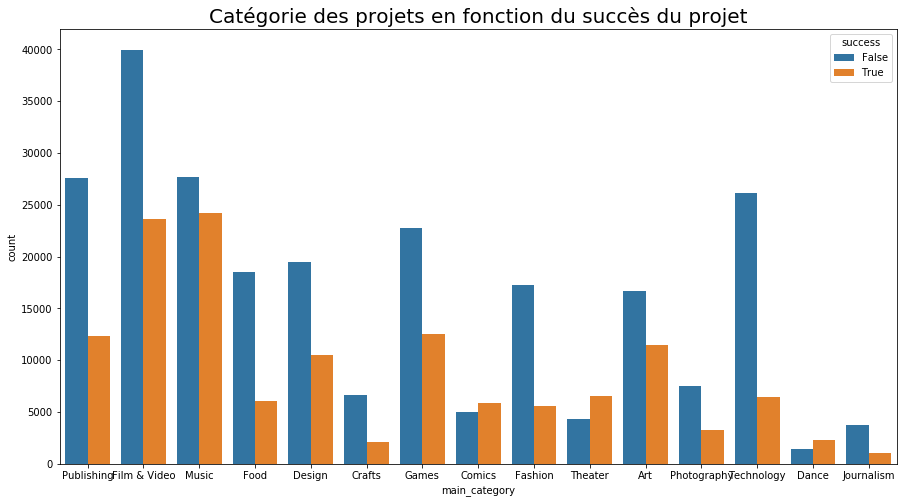

In [238]:
# Graphique montrant la catégorie des projets en fonction du succès du projet

fig, axs = plt.subplots(figsize=(15,8))

g = sns.countplot(x='main_category', data=df, hue='success')
g.set_title('Catégorie des projets en fonction du succès du projet', fontsize=20)

In [260]:
# Calcul des taux de réussite par catégorie les plus élevés

tea1 = df['name'][(df['main_category'] == 'Theater') & (df['success'] == True)].count()
tea2 = df['name'][df['main_category'] == 'Theater'].count()
taux1 = tea1 / tea2 *100


com1 = df['name'][(df['main_category'] == 'Comics') & (df['success'] == True)].count()
com2 = df['name'][df['main_category'] == 'Comics'].count()
taux2 = com1 / com2 *100

dan1 = df['name'][(df['main_category'] == 'Dance') & (df['success'] == True)].count()
dan2 = df['name'][df['main_category'] == 'Dance'].count()
taux3 = dan1 / dan2 *100

print("On peut voir ici que les catégories qui ont le plus gros taux de réussite sont Théatre ({}%), Dance ({}%) et Comics ({}%).".format(taux1.round(1), taux3.round(1), taux2.round(1)))

On peut voir ici que les catégories qui ont le plus gros taux de réussite sont Théatre (59.9%), Dance (62.0%) et Comics (54.0%).


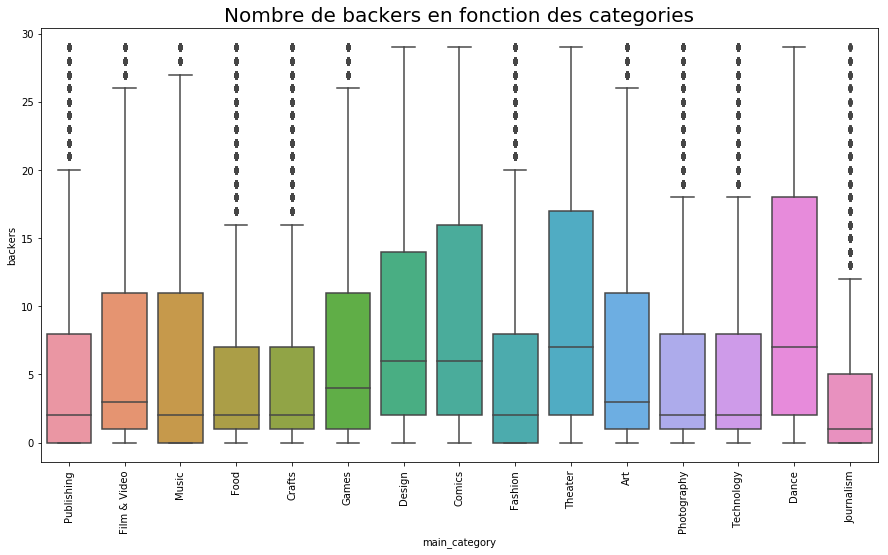

In [239]:
# Graphique montrant le nombre de backers en fonction des categories

plt.figure(figsize = (15,8))
g = sns.boxplot(x = 'main_category', y = 'backers', data=df[df['backers'] < 30])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Nombre de backers en fonction des categories', fontsize=20)
plt.show()

On observe que les categories qui ont le plus de backers correspondent aux categories qui ont le plus gros taux de réussite (Comics, Theater et Dance). On peut en déduire que les catégories et les backers sont deux paramètres importants dans la réussite d'un projet Kickstarter.

Text(0.5,1,'Devise du projet en fonction du succès du projet')

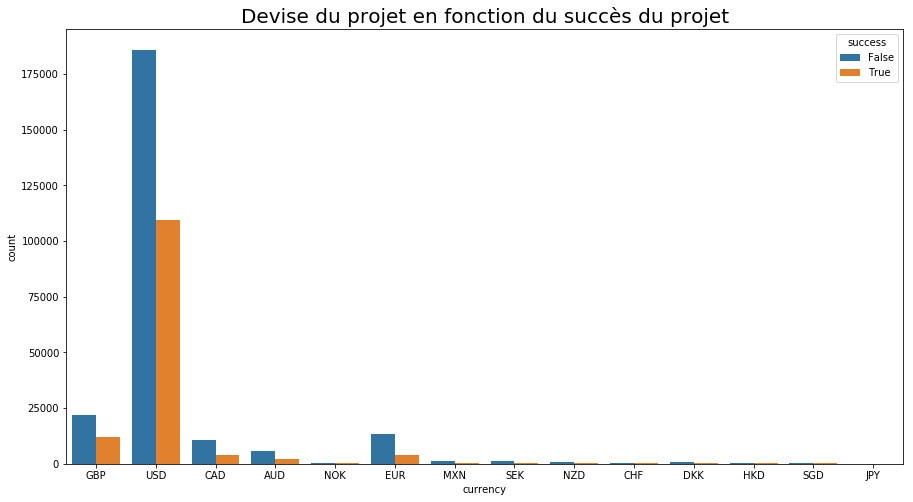

In [240]:
# Graphique montrant la devise du projet en fonction du succès du projet

fig, axs = plt.subplots(figsize=(15,8))

g = sns.countplot(x='currency', data=df, hue='success')
g.set_title('Devise du projet en fonction du succès du projet', fontsize=20)

In [263]:
# Calcul des taux de réussite les plus élevés par devise

ame1 = df['name'][(df['currency'] == 'USD') & (df['success'] == True)].count()
ame2 = df['name'][df['currency'] == 'USD'].count()
taux1 = ame1 / ame2 *100

gbp1 = df['name'][(df['currency'] == 'GBP') & (df['success'] == True)].count()
gbp2 = df['name'][df['currency'] == 'GBP'].count()
taux2 = gbp1 / gbp2 *100

cad1 = df['name'][(df['currency'] == 'CAD') & (df['success'] == True)].count()
cad2 = df['name'][df['currency'] == 'CAD'].count()
taux3 = cad1 / cad2 *100

eur1 = df['name'][(df['currency'] == 'EUR') & (df['success'] == True)].count()
eur2 = df['name'][df['currency'] == 'EUR'].count()
taux4 = eur1 / eur2 *100

print("Taux USD : {}, Taux GBP : {}, Taux CAD : {}, Taux EUR : {}".format(taux1.round(1), taux2.round(1), taux3.round(1), taux4.round(1)))

Taux USD : 37.0, Taux GBP : 35.4, Taux CAD : 27.7, Taux EUR : 22.3


La monnaie n'est pas une variable déterminante dans la réussite ou non d'un projet. Il faut aussi noter que le fait que comme une très grande majorité des projets sont proposé en dollar américain, il est difficile de faire un comparatif avec les autres monnaies. On peut tout de même noter que le dollar américain est la livre sterling ont un meilleur taux de réussite que l'Euro ou le dollar canadien et australien.

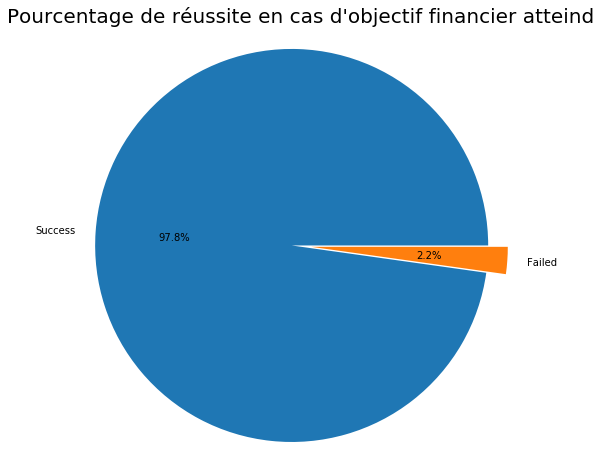

In [241]:
# Graphique montrant le pourcentage de réussite en cas d'objectif financier atteind

get_goal_success = df[(df['usd_goal_real'] < df['usd_pledged_real']) & (df['success'] == True)]['success'].count()
get_goal_failed = df[(df['usd_goal_real'] < df['usd_pledged_real']) & (df['success'] == False)]['success'].count()

plt.figure(figsize=(8,8))

labels = 'Success', 'Failed'
sizes = [get_goal_success, get_goal_failed]
explode = (0, 0.1)  # explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
 
plt.axis('equal')
plt.title('Pourcentage de réussite en cas d\'objectif financier atteind', fontsize=20)
plt.show()

Ce graphique montre une statistique très parlante, et très logique à la fois. En effet, lorsqu'un projet obtient un financement égal ou supérieur à l'objectif fixé, le projet est réalisé dans 97.8% du temps. Ce qui paraît normal, mais il est important de préciser que si vous souhaitez que votre projet soit réalisé, il y a de très grandes chances que votre projet doit être financé à hauteur de l'objectif fixé.

## Conclusion

Nous avons parcouru et analysé beaucoup de données. Cependant, les variables qui ressortent le plus pour prédire la réussite d'un projet sont :
- la catégorie de votre projet
- le nombre de personnes qui soutiennent votre projet
- la devise utilisée
- réussire à atteindre l'objextif financier que vous vous étiez fixé